In [2]:
from hfqco.calculator import nominal_ic, shunt_calc
print(nominal_ic(Ic=60.8*10**(-6), L=3.5*10**(-12)))


1.9175373305009014e-05


･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
Using default parameters


100%|██████████| 11/11 [00:30<00:00,  2.73s/it]


,low(value),low(%),high(value),high(%)
SQUID6,0.336445,-47.265625,0.757625,18.75000
SQUID2,0.002609,-99.609375,1.064625,59.37500
BIAS,0.001953,-99.609375,1.000000,100.00000
R1,10.062500,-64.062500,56.000000,100.00000
CLKL1,0.023438,-99.609375,12.000000,100.00000
SQUID1,0.002375,-99.609375,0.931000,53.12500
SQUID5,0.002492,-99.609375,0.991891,55.46875
L1,6.972656,-66.796875,42.000000,100.00000
SQUID3,0.001906,-99.609375,0.789187,61.71875
SQUID4,0.002375,-99.609375,0.793250,30.46875


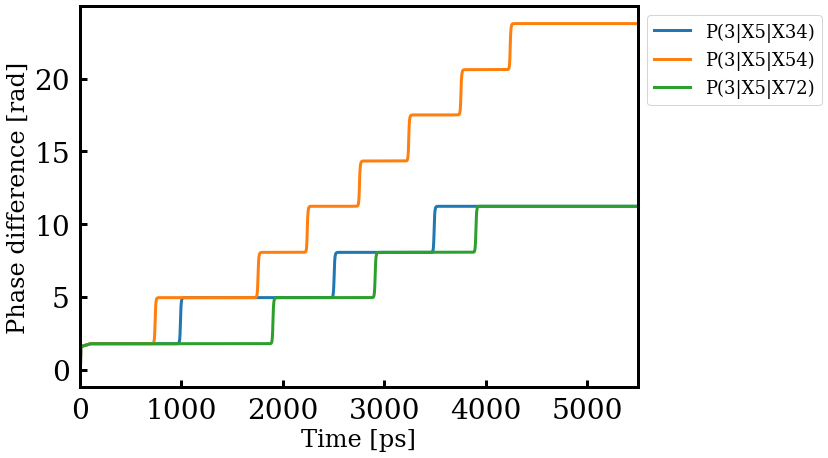

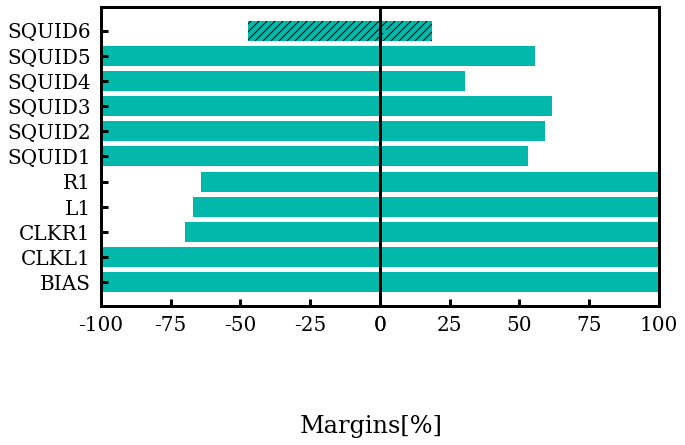

In [7]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +



** + -------------------- +
** |     HFQDFF           |
** + -------------------- +
.subckt dff_squid1   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID1(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID1(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid2   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID2(0.668)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID2(0.668)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid3   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID3(0.518)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID3(0.518)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid4   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID4(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID4(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid5   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID5(0.638)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID5(0.638)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid6   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID6(0.638)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID6(0.638)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt dff_squid7   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2
R1                  1       5   20ohm 
B2                  2       5   jjmod area=2
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt DFF 1 21 9 100
L1                      1       2       1pH fcheck
R1                      2       100     34ohm
L2                      2       3       4.2pH fcheck
X1      dff_squid1      3       0
L3                      3       4       8.4pH fcheck
X2      dff_squid2      4       0
L4                      4       5       1pH fcheck
R2                      5       100     #R1(28)ohm
L5                      5       6       #L1(21)pH fcheck
L6                      6       7       1pH fcheck 
X3      dff_squid3      7       0
L7                      7       8       8.4pH fcheck
X4      dff_squid4      8       0
L8                      8       9       3.2pH fcheck 


L21                     21      22      1pH fcheck
R3                      22      100     #CLKR1(30)ohm
L22                     22      23      4.2pH fcheck
X6      dff_squid5      23      0
L23                     23      24      4pH fcheck
X7      dff_squid6      24      25
X8      dff_squid7      25      26
L24                     26      7       #CLKL1(6)pH fcheck 
.ends

** + ---------------------------------- +


*** top cell: 

Vin1                        31      0       PWL(0ps 0mV   750ps 0mV 751ps 0.517mV 752ps 0.517mV 753ps 0mV   2250ps 0mV 2251ps 0.517mV 2252ps 0.517mV 2253ps 0mV   3250ps 0mV 3251ps 0.517mV 3252ps 0.517mV 3253ps 0mV)
R31                         31      32                       1ohm
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100

Vinclk                      51      0       PWL(0ps 0mV   500ps 0mV 501ps 0.517mV 502ps 0.517mV 503ps 0mV   1500ps 0mV 1501ps 0.517mV 1502ps 0.517mV 1503ps 0mV   2000ps 0mV 2001ps 0.517mV 2002ps 0.517mV 2003ps 0mV   2500ps 0mV 2501ps 0.517mV 2502ps 0.517mV 2503ps 0mV   3000ps 0mV 3001ps 0.517mV 3002ps 0.517mV 3003ps 0mV   3500ps 0mV 3501ps 0.517mV 3502ps 0.517mV 3503ps 0mV   4000ps 0mV 4001ps 0.517mV 4002ps 0.517mV 4003ps 0mV)
R51                         51      52                       1ohm
X51    jtl_base8            52      53      100
X52    jtl_base8            53      54      100
X53    jtl_base8            54      55      100
X54    jtl_base8            55      56      100

X1      DFF                 36      56      72      200

X71    jtl_base8            72      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps #BIAS(0.5)mV)


*** jsim input file ***
.tran 1ps 5500ps 0ps 1ps

.print phase  3|X5|X34
.print phase  3|X5|X54

.print phase  3|X5|X72
.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": ["P(3|X5|X34)","P(3|X5|X54)","P(3|X5|X72)"],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util, pyjosim, netlist

from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)
importlib.reload(netlist)



# df = simulation(input)
# sim_plot(df)

inp_df = util.create_inp_df("SQUID6", 0.638,0.728,0.03,"R1", 20,30,2)
d = netlist.Netlist(input, config_data)
d.get_margins()
# d.custom_simulation(inp_df)
# inp_df.to_csv("dff1.csv")

# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# d.get_margins()